# Classification Lab

This Jupyter Notebook contains the results and attempts at classification!

In [81]:
import numpy as np
import os.path as path
from pathlib import Path
import glob
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay
import pandas as pd
import monke_features as mf
import monke_classify as mc
import monke_io as mio

# Test 1: 10 February

**Feature Tested**: Change in Velocity (Directional Change)

**Noise Correction**: Sliding window of 15 and threshold of 0.2

**Training Data**: Boba, April 11

**Testing Data**
* Boba (PD) [April 21]
* Koi (PD) [April 11]
* Bandung (PD) [March 27, 3]
* Briyani (Control) [May 19]
* Horlicks (Control) [April 12]
* Tutu Kueh (Control) [April 21]


In [26]:
cd = Path(path.abspath(""))

pose_files = sorted(glob.glob(path.join(cd, "raw", "pose", "*")))
label_files = sorted(glob.glob(path.join(cd, "raw", "tremors", "*")))

training_data = []
training_labels = []
test_data = {}
test_labels = {}

for i in range(len(pose_files)):
    pose_file = pose_files[i]
    label_file = label_files[i]

    poses = np.genfromtxt(pose_file, skip_header=3, delimiter=",")[:, 1:]
    processed = mf.changes_in_changes(mf.vel(poses), 15, 0.2)
    labels = mf.generate_labelled_frames(processed, pd.read_csv(label_file))

    if("boba_apr11" in pose_file):
        training_data.append(processed)
        training_labels.append(labels)

    name = path.split(pose_file)[-1].split(".")[0]
    
    test_data[name] = processed
    test_labels[name] = np.array(labels)

In [27]:
scores = {}
predictions = {}

clf = RandomForestClassifier()

clf.fit(training_data[0], training_labels[0])

for j in test_data:
    test_X = test_data[j]
    test_y = test_labels[j]

    pred_y = clf.predict(test_X)

    predictions[j] = pred_y
    scores[j] = {"precision":precision_score(test_y, pred_y), "recall":recall_score(test_y, pred_y), 
                 "f1":f1_score(test_y, pred_y), "accuracy":accuracy_score(test_y, pred_y)}

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [28]:
pd.DataFrame(scores)

,bandung_mar27_3,boba_apr11,boba_apr21,briyani_may19,horlicks_apr12,koi_apr11,tutukueh_apr21
precision,0.010417,0.996975,0.201207,0.000000,0.000000,0.188544,0.000000
recall,0.010256,0.991667,0.061728,0.000000,0.000000,0.015310,0.000000
f1,0.010336,0.994314,0.094473,0.000000,0.000000,0.028320,0.000000
accuracy,0.927818,0.997691,0.893494,0.969418,0.977941,0.713478,0.979741


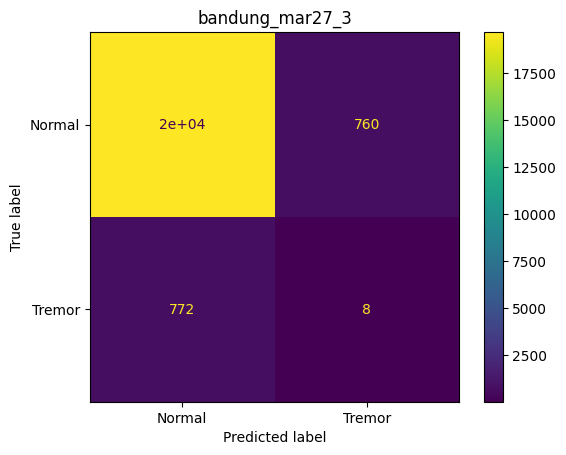

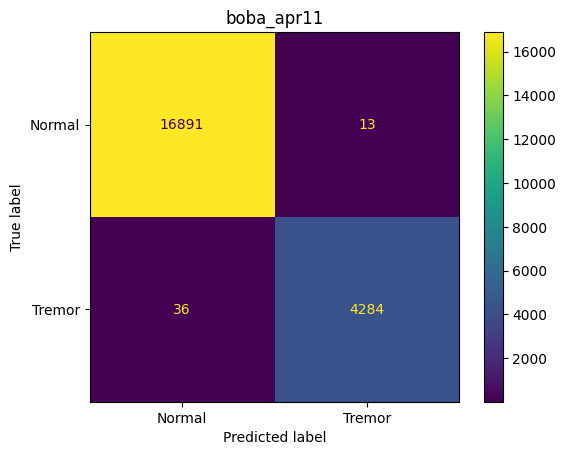

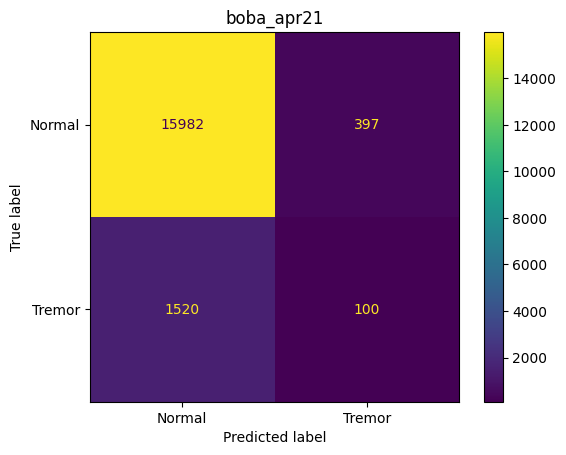

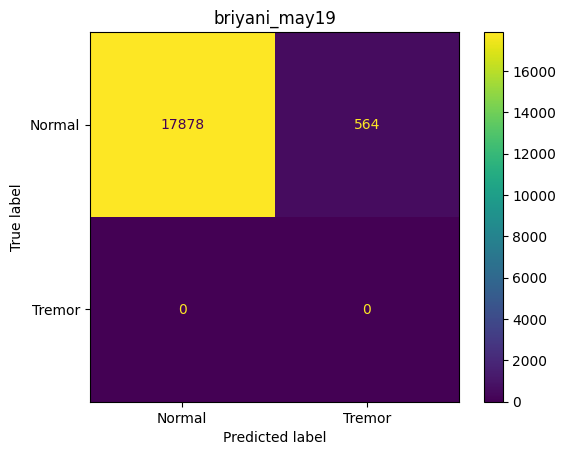

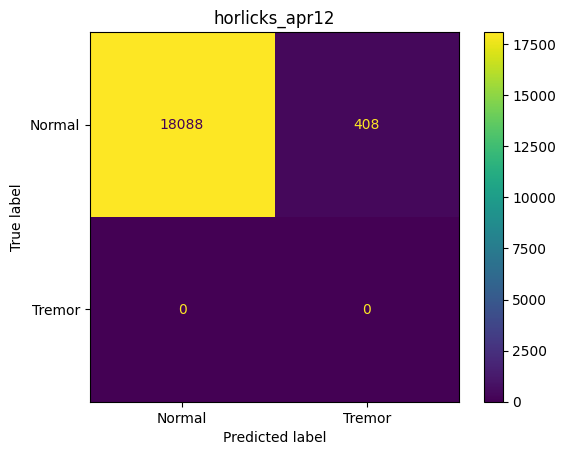

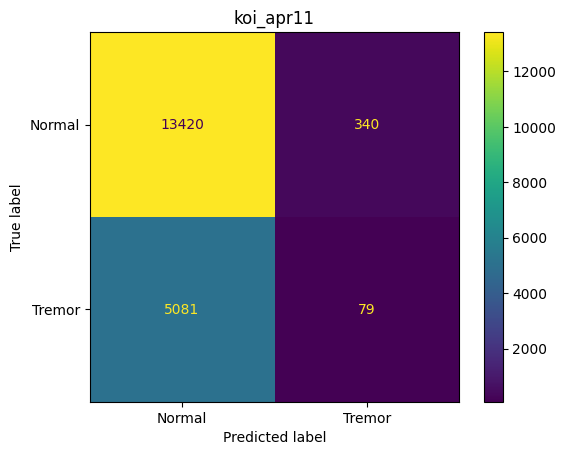

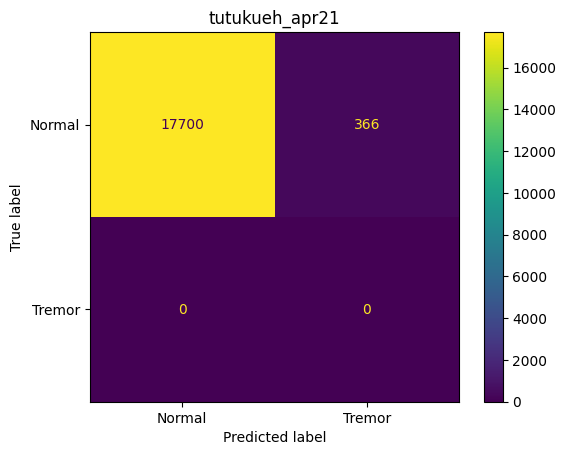

In [29]:
for name in predictions:
    display = ConfusionMatrixDisplay.from_predictions(test_labels[name], predictions[name], display_labels=["Normal", "Tremor"])
    display.ax_.set_title(name)

In [32]:
for name in predictions:
    df = pd.DataFrame({"prediction":predictions[name], "truth":test_labels[name]})
    df.to_csv(path.join(cd, "classification", "predictions_cic", f"{name}_predictions.csv"))

# Test 2: 11 February

**Feature Tested**: Change in 3D Angular Change (Directional Change in 3D Angles)

**Noise Correction**: Sliding window of 30 and threshold of 0.2

**Training Data**: Boba, April 11

**Testing Data**
* Boba (PD) [April 21]
* Koi (PD) [April 11]
* Bandung (PD) [March 27, 3]
* Briyani (Control) [May 19]
* Horlicks (Control) [April 12]
* Tutu Kueh (Control) [April 21]

In [8]:
training_data2 = None
training_labels2 = None
test_data2 = {}
test_labels2 = {}

for i in range(len(pose_files)):
    pose_file = pose_files[i]
    label_file = label_files[i]

    poses = np.genfromtxt(pose_file, skip_header=3, delimiter=",")[:, 1:]
    processed = mf.changes_in_changes_in_phi_theta(poses)
    labels = mf.generate_labelled_frames(processed, pd.read_csv(label_file))

    if("boba_apr11" in pose_file):
        training_data2 = processed
        training_labels2 = labels

    name = path.split(pose_file)[-1].split(".")[0]
    
    test_data2[name] = processed
    test_labels2[name] = np.array(labels)

In [11]:
scores2 = {}
predictions2 = {}

clf2 = RandomForestClassifier()

clf2.fit(training_data2, training_labels2)

for j in test_data2:
    test_X = test_data2[j]
    test_y = test_labels2[j]

    pred_y = clf.predict(test_X)

    predictions2[j] = pred_y
    scores2[j] = {"precision":precision_score(test_y, pred_y), "recall":recall_score(test_y, pred_y), 
                 "f1":f1_score(test_y, pred_y), "accuracy":accuracy_score(test_y, pred_y)}

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [12]:
pd.DataFrame(scores2)

,bandung_mar27_3,boba_apr11,boba_apr21,briyani_may19,horlicks_apr12,koi_apr11,tutukueh_apr21
precision,0.000000,1.000000,0.000000,0.000000,0.000000,0.200000,0.000000
recall,0.000000,0.999769,0.000000,0.000000,0.000000,0.000194,0.000000
f1,0.000000,0.999884,0.000000,0.000000,0.000000,0.000387,0.000000
accuracy,0.962912,0.999953,0.909561,0.999837,0.999025,0.726666,0.999612


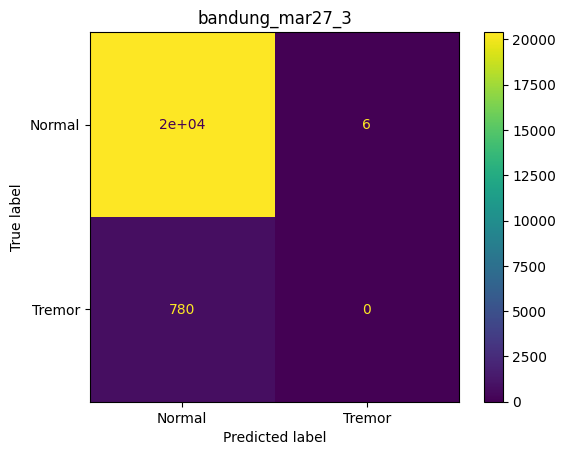

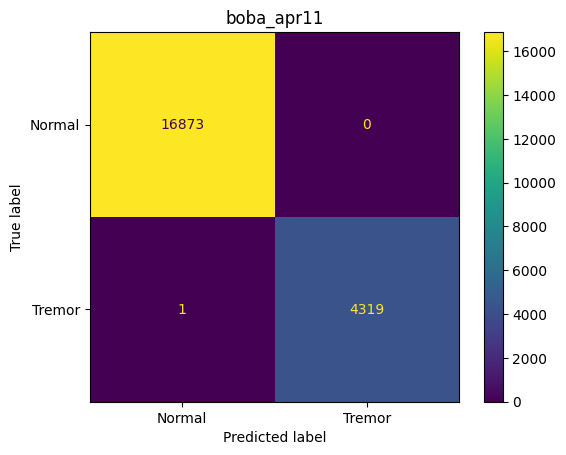

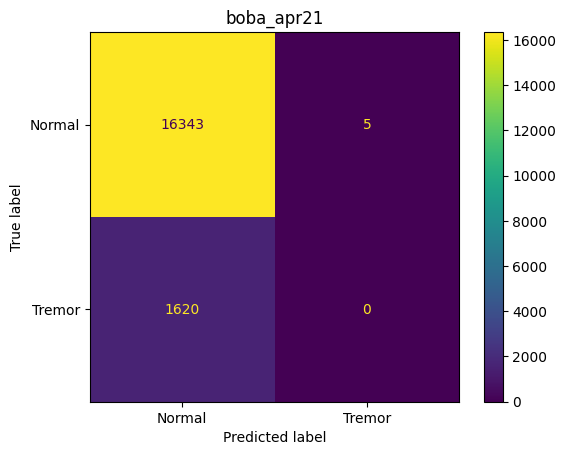

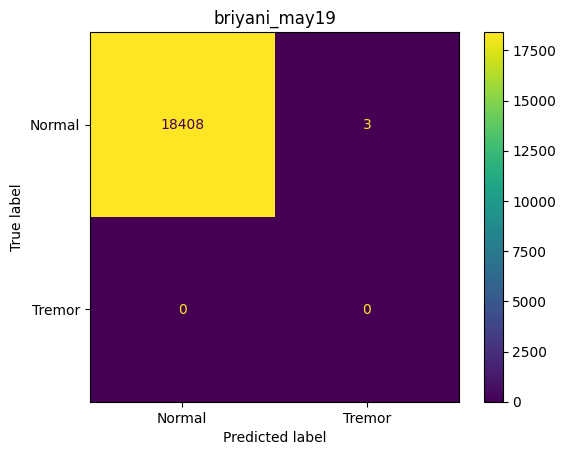

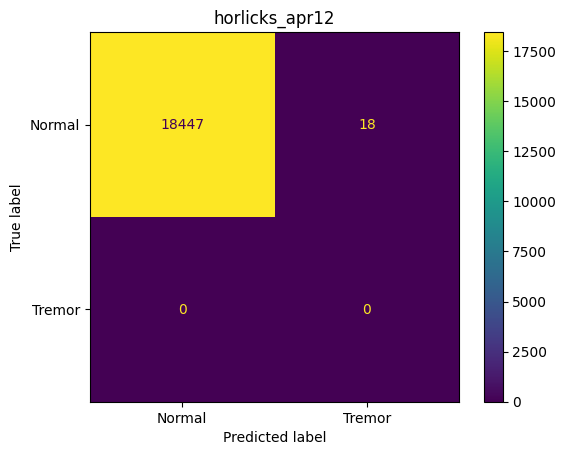

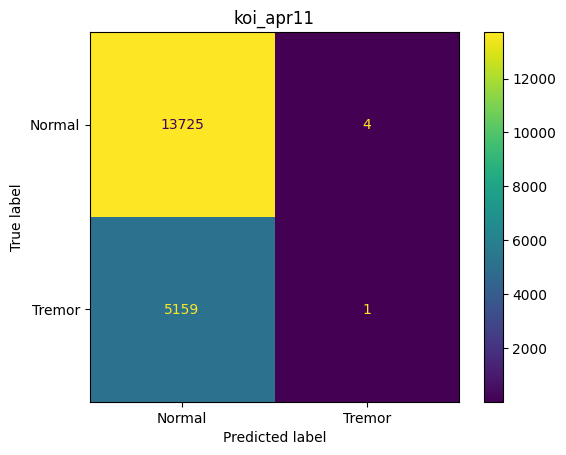

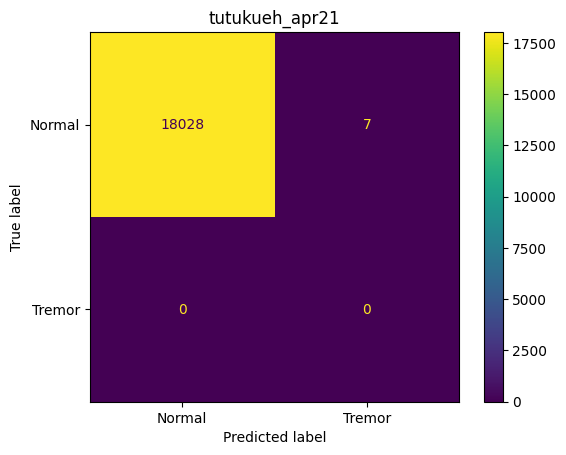

In [24]:
for name in predictions2:
    display = ConfusionMatrixDisplay.from_predictions(test_labels2[name], predictions2[name], display_labels=["Normal", "Tremor"])
    display.ax_.set_title(name)

# Test 3: 13 February

**Feature Tested**: Change in Velocity (Directional Change)

**Noise Correction**: Sliding window of 15 and threshold of 1.0

**Training Data**
* Boba, April 11
* Boba, April 21
* Boba, April 21 (2)
* Boba, April 25
* Boba, April 25 (2)

**Testing Data**
* Parkinson's Disease
    * Bandung
        * March 27
        * March 27 (2)
        * March 27 (3)
        * May 19 (2)
    * Boba
        * April 11
        * April 21
        * April 21 (2)
        * April 25
        * April 25 (2)
    * Koi
        * April 11
        * April 17
        * April 25
        * April 25 (3)
        * April 25 (4)
        * April 25 (5)
        * April 25 (6)
* Control
    * Briyani, May 19
    * Horlicks, April 12
    * Tutu Kueh, April 21

In [10]:
import numpy as np
import pandas as pd
import os.path as path
from pathlib import Path
import glob
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import monke_io as mio
import monke_features as mf
import monke_classify as mc

In [2]:
cd = Path(path.abspath(""))

pose_files = sorted(glob.glob(path.join(cd, "raw", "pose", "*")))
label_files = sorted(glob.glob(path.join(cd, "raw", "tremors", "*")))
pose2d_files = sorted(glob.glob(path.join(cd, "raw", "2d", "*.csv")))

Compared to previous tests, we will be using more samples. For the testing data, we will be combining together all of Boba's labelled videos.

In [128]:
test_data3 = {}
test_labels3 = {}

window = 15
threshold = 0.5

process = lambda x : mf.changes_in_changes(mf.vel(x), window, threshold)

for pose_file in pose_files:
    poses = mio.read_pose(pose_file, full_path=True)
    name = path.split(pose_file)[-1].split(".")[0]
    test_data3[name] = process(poses)

In [129]:
for label_file in label_files:
    name = path.split(label_file)[-1].split("_tremors")[0]
    labels = np.array(mf.generate_labelled_frames(test_data3[name], mio.read_tremors(label_file, full_path=True)))
    test_labels3[name] = labels

In [130]:
training_data3 = None
training_labels3 = None

for name in test_data3:
    if "boba" in name:
        training_data3 = test_data3[name] if training_data3 is None else np.concatenate((training_data3, test_data3[name]), axis=0)
        training_labels3 = test_labels3[name] if training_labels3 is None else np.concatenate((training_labels3, test_labels3[name]), axis=0)

In addition to previous trials, we will be including sample weights based on the DLC 2D data.

Unfortunately, as there are two cameras, we must merge the likelihoods. Here is a helper function to extend the  weights from one camera to match the size of weights from the other camera

In [131]:
def combine_weights(weights1, weights2):
    frames1 = weights1.shape[0]
    frames2 = weights2.shape[0]

    if frames1 > frames2:
        weights1 = weights1[:frames2, :]
    elif frames2 > frames1:
        weights2 = weights2[:frames1, :]
    
    return np.mean((weights1 + weights2)/2, axis=1)

Now, the actual sample weights!

In [132]:
training_weights = None
test_weights = {}

for pose2d_file in pose2d_files:
    pose2d_data = mio.read_pose2d(pose2d_file, full_path=True)
    pose2d_data_reshaped = pose2d_data.reshape((pose2d_data.shape[0], pose2d_data.shape[1]//3, 3))
    likelihood = pose2d_data_reshaped[:, :, 2]

    name = path.split(pose2d_file)[-1].split("_camera")[0].split(".csv")[0]
    if name in test_weights:
        test_weights[name] = combine_weights(test_weights[name], likelihood)

        if("boba" in name):
            test_weights[name] = test_weights[name][:test_data3[name].shape[0]]
            training_weights = test_weights[name] if training_weights is None else np.concatenate((training_weights, test_weights[name]), axis=0)
    else:
        test_weights[name] = likelihood

In [133]:
clf = RandomForestClassifier(class_weight="balanced")
predictions, metrics = mc.classify(training_data3, training_labels3, test_data3, test_labels3, classifier=clf, train_weights=training_weights)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [134]:
df = pd.DataFrame(metrics)
df.to_csv(path.join(cd, "classification", f"test3_w{window}_t{threshold}.csv"))
df

,bandung_mar27,bandung_mar27_2,bandung_mar27_3,bandung_may19_2,boba_apr11,boba_apr21,boba_apr21_2,boba_apr25,boba_apr25_2,briyani_may19,horlicks_apr12,koi_apr11,koi_apr17,koi_apr25,koi_apr25_3,koi_apr25_4,koi_apr25_5,koi_apr25_6,tutukueh_apr21
precision,0.001729,0.007338,0.046256,0.000000,0.845356,0.684234,0.802185,0.562747,0.393519,0.000000,0.000000,0.124528,0.065116,0.152027,0.005345,0.029091,0.156158,0.267327,0.000000
recall,0.022222,0.077778,0.053846,0.000000,0.906019,0.929630,0.920792,0.880247,0.944444,0.000000,0.000000,0.025581,0.010313,0.133929,0.008730,0.024242,0.088750,0.085714,0.000000
f1,0.003208,0.013410,0.049763,0.000000,0.874637,0.788275,0.857406,0.686567,0.555556,0.000000,0.000000,0.042444,0.017806,0.142405,0.006631,0.026446,0.113177,0.129808,0.000000
accuracy,0.941434,0.951470,0.924425,0.926661,0.947135,0.955053,0.953407,0.969327,0.935970,0.927719,0.913819,0.685201,0.662220,0.814402,0.822681,0.748183,0.842725,0.615303,0.950017


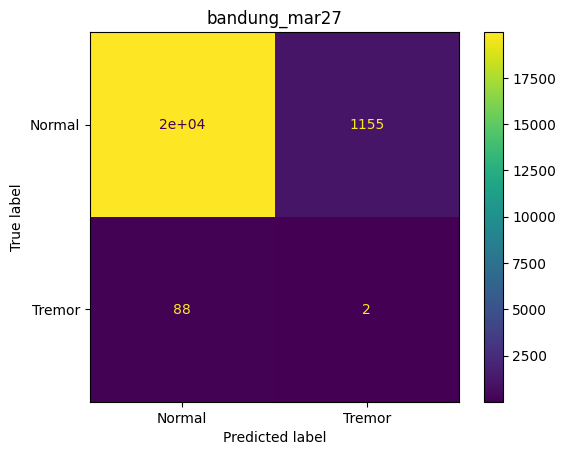

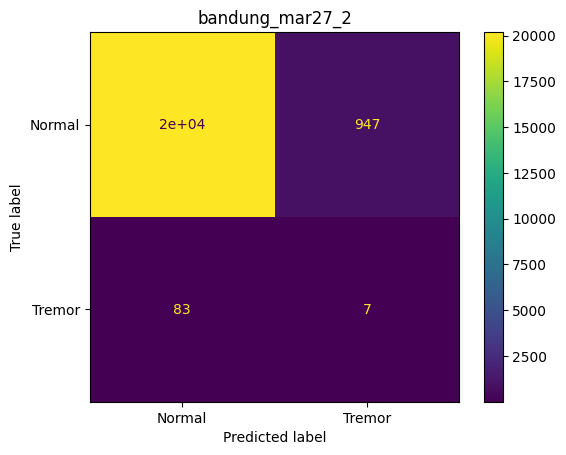

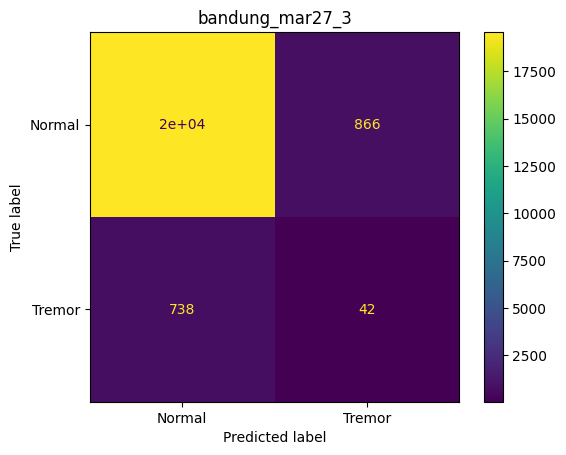

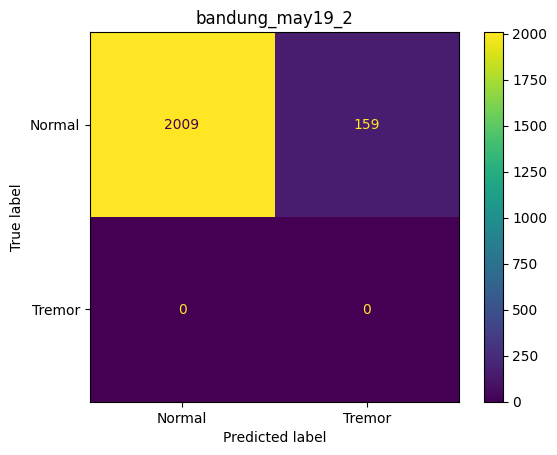

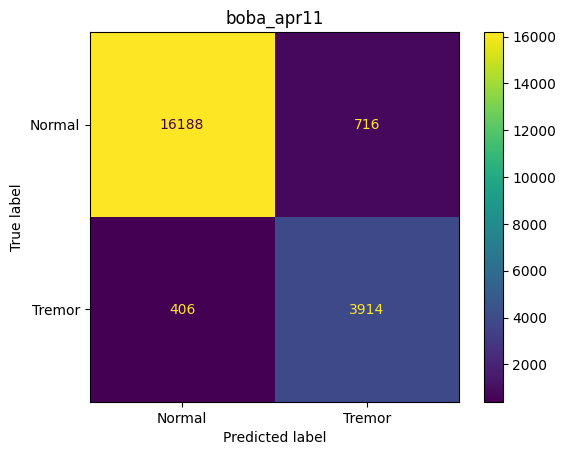

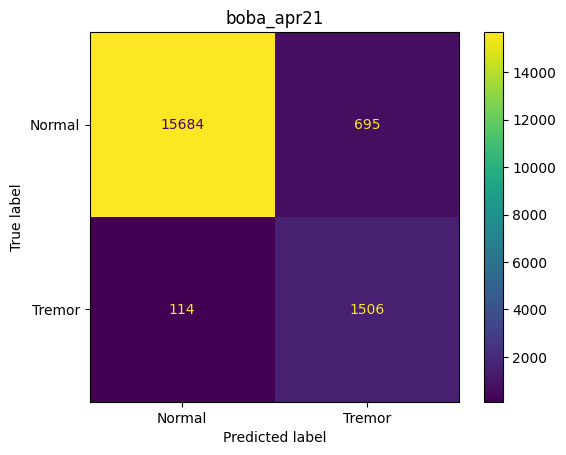

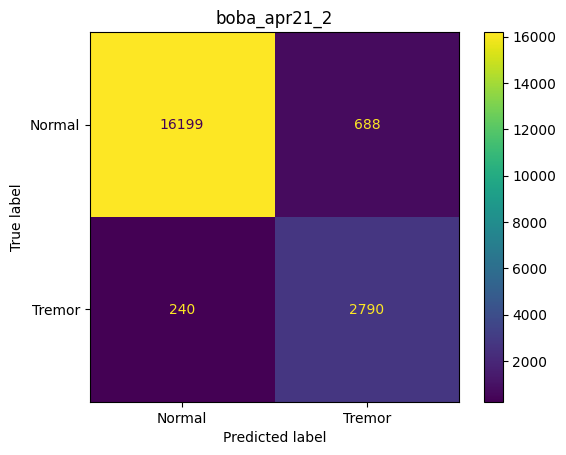

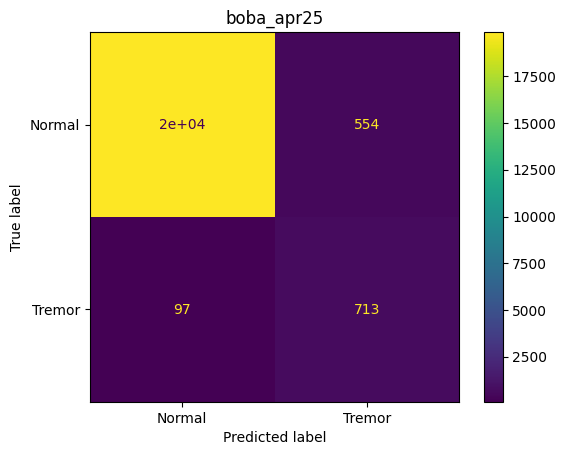

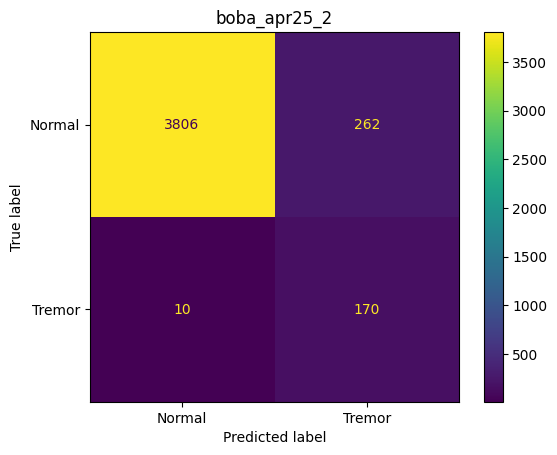

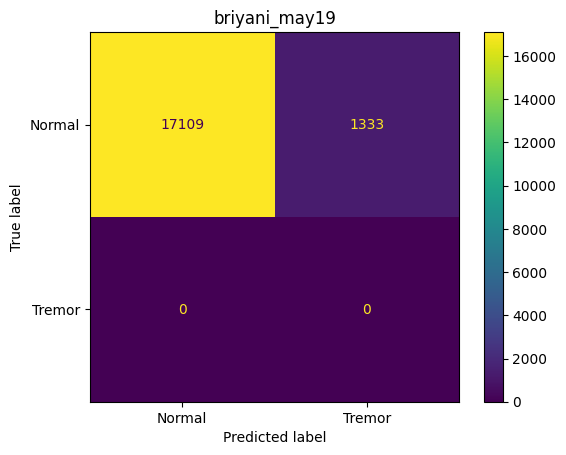

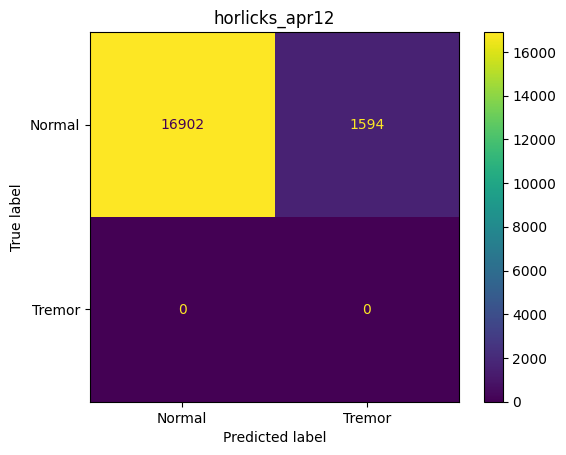

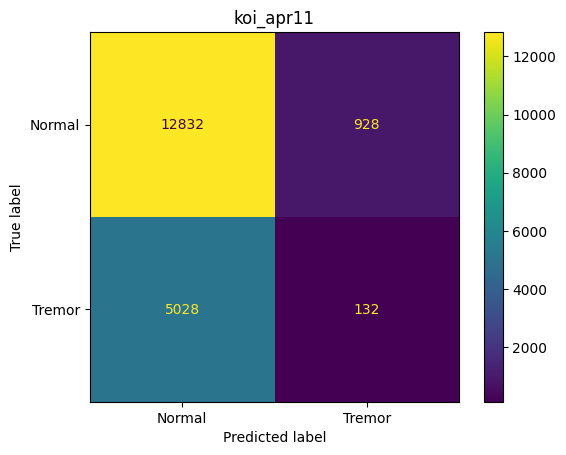

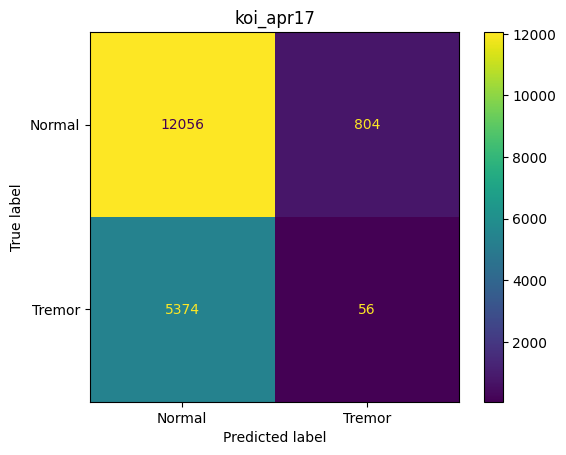

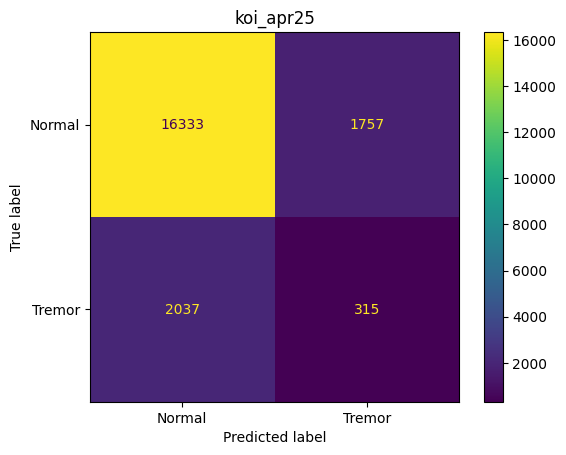

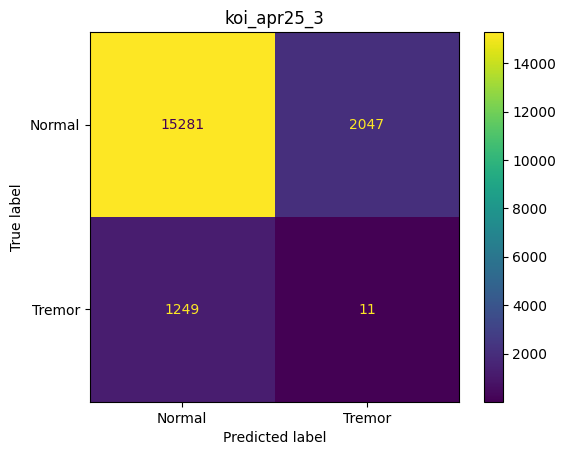

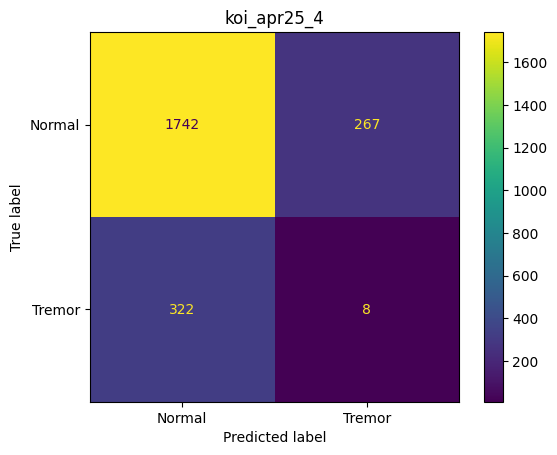

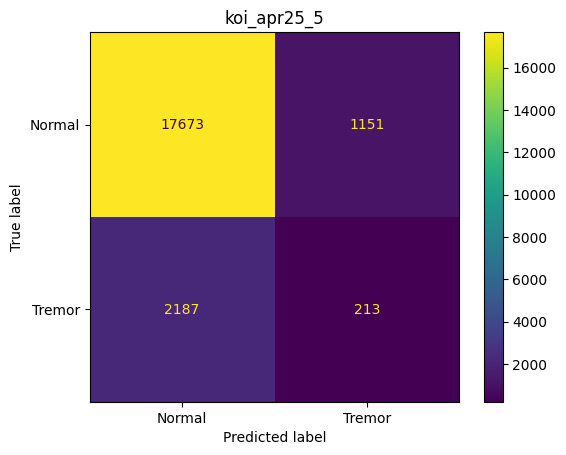

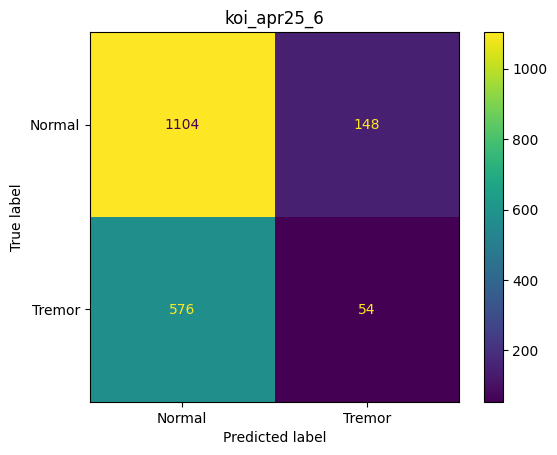

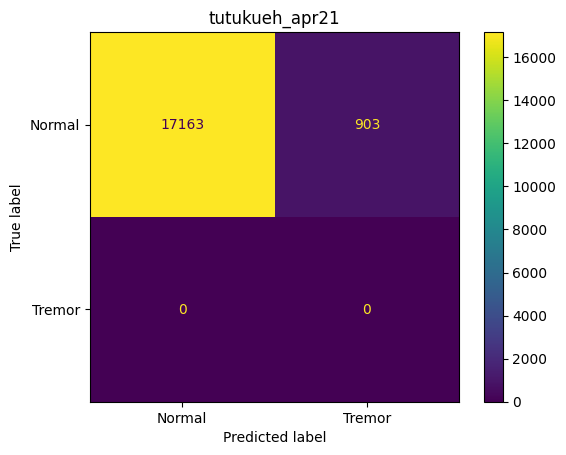

In [135]:
for name in predictions:
    display = ConfusionMatrixDisplay.from_predictions(test_labels3[name], predictions[name])
    if(display.confusion_matrix.size == 1):
        display.ax_.set_xticklabels(["Normal"])
        display.ax_.set_yticklabels(["Normal"])
    else:
        display.ax_.set_xticklabels(["Normal", "Tremor"])
        display.ax_.set_yticklabels(["Normal", "Tremor"])
    display.ax_.set_title(f"{name}")